In [1]:
import pandas as pd
import mysql.connector
import os
import matplotlib.pyplot as plt

In [2]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='Target_Ecom'
)
cursor = conn.cursor()

### List all unique cities where customers are located.

In [4]:
query = """ select distinct(customer_city)from customers """
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### Count the number of orders placed in 2017.

In [6]:
query = """ select count(order_id) from orders where order_purchase_timestamp like '%2017%' """
cursor.execute(query)
data = cursor.fetchall()
print('Total orders placed in 2017 are',data[0][0])

Total orders placed in 2017 are 45101


### Find the total sales per category.

In [8]:
query = """ select upper(products.product_category),round(sum(payments.payment_value),2) from products 
join order_items on products.product_id=order_items.product_id 
join payments on payments.order_id=order_items.order_id group by products.product_category; """
cursor.execute(query)
data = cursor.fetchall()
Sales_per_Category=pd.DataFrame(data,columns=['Category','Sales'])
Sales_per_Category

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### Calculate the percentage of orders that were paid in installments.

In [10]:
query="""select count(order_id)/(select count(order_id) from payments) from payments where payment_installments>1
"""
cursor.execute(query)
data = cursor.fetchall()
print(f'Percentage of orders that were paid in installments are {round(float(data[0][0])*100,2)}%')

Percentage of orders that were paid in installments are 49.42%


### Count the number of customers from each state. 

In [12]:
query="""select customer_state,count(customer_id) from customers group by customer_state"""
cursor.execute(query)
data = cursor.fetchall()
Statewise_Customer_Count=pd.DataFrame(data,columns=['State','Customers Count'])
Statewise_Customer_Count=Statewise_Customer_Count.sort_values(by='Customers Count',ascending=False)
Statewise_Customer_Count

,State,Customers Count
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


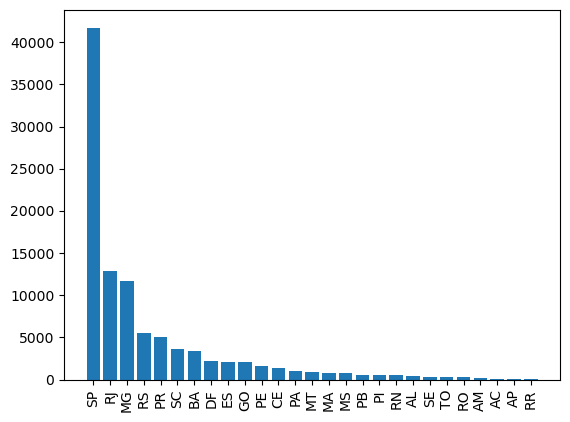

In [13]:
plt.bar(Statewise_Customer_Count['State'],Statewise_Customer_Count['Customers Count'])
plt.xticks(rotation=90)
plt.show()

### Calculate the number of orders per month in 2018.

In [15]:
query="""select month(order_purchase_timestamp),count(order_id) from orders where order_purchase_timestamp like '%2018%' group by month(order_purchase_timestamp) order by month(order_purchase_timestamp)
"""
cursor.execute(query)
data = cursor.fetchall()
order_per_month_2018=pd.DataFrame(data,columns=['Month','Orders'])
order_per_month_2018

,Month,Orders
0,1,7269
1,2,6728
2,3,7211
3,4,6939
4,5,6873
5,6,6167
6,7,6292
7,8,6512
8,9,16
9,10,4


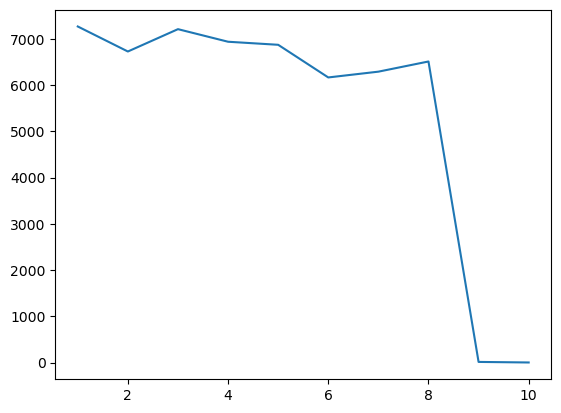

In [16]:
plt.plot(order_per_month_2018['Month'],order_per_month_2018['Orders'])

### Find the average number of products per order, grouped by customer city.

In [18]:
query="""select customers.customer_city,round((sum(order_items.order_item_id)/count(order_items.order_id)),2) from customers join orders on orders.customer_id=customers.customer_id join order_items on orders.order_id=order_items.order_id group by customers.customer_city"""
cursor.execute(query)
data = cursor.fetchall()
data

[('anapolis', Decimal('1.20')),
 ('sao paulo', Decimal('1.23')),
 ('brasilia', Decimal('1.17')),
 ('belo horizonte', Decimal('1.19')),
 ('lagoa santa', Decimal('1.27')),
 ('osasco', Decimal('1.21')),
 ('campo grande', Decimal('1.16')),
 ('rio de janeiro', Decimal('1.20')),
 ('sao luis', Decimal('1.19')),
 ('campos dos goytacazes', Decimal('1.09')),
 ('sao joaquim de bicas', Decimal('1.30')),
 ('sao jose dos campos', Decimal('1.18')),
 ('nova friburgo', Decimal('1.09')),
 ('porto alegre', Decimal('1.23')),
 ('paripueira', Decimal('1.00')),
 ('salvador', Decimal('1.18')),
 ('itaborai', Decimal('1.06')),
 ('atibaia', Decimal('1.21')),
 ('ribeirao preto', Decimal('1.19')),
 ('carmo da mata', Decimal('1.00')),
 ('andorinha', Decimal('1.00')),
 ('alegrete', Decimal('1.15')),
 ('curitiba', Decimal('1.24')),
 ('maua', Decimal('1.09')),
 ('presidente prudente', Decimal('1.23')),
 ('jundiai', Decimal('1.23')),
 ('macae', Decimal('1.15')),
 ('campinas', Decimal('1.19')),
 ('fernandopolis', Decima

###  Calculate the percentage of total revenue contributed by each product category.

In [20]:
query="""select products.product_category,(sum(payments.payment_value)/(select sum(payments.payment_value) from payments))*100 from products join order_items on order_items.product_id=products.product_id join payments on payments.order_id=order_items.order_id group by products.product_category;
"""
cursor.execute(query)
data = cursor.fetchall()
Product_Revenue_Percentage=pd.DataFrame(data,columns=['Product Category','Revenue Percentage'])
Product_Revenue_Percentage.sort_values(by='Revenue Percentage',ascending=False)

,Product Category,Revenue Percentage
3,bed table bath,10.697529
11,HEALTH BEAUTY,10.352841
5,computer accessories,9.902824
1,Furniture Decoration,8.933649
15,Watches present,8.927654
...,...,...
72,PC Gamer,0.013583
66,House Comfort 2,0.010685
69,cds music dvds,0.007492
71,Fashion Children's Clothing,0.004908


### Identify the correlation between product price and the number of times a product has been purchased.

In [22]:
"""SELECT 
    order_items.product_id, 
    COUNT(order_items.order_id) AS total_orders, 
    order_items.price
FROM 
    payments 
JOIN 
    order_items ON order_items.order_id = payments.order_id 
JOIN 
    products ON products.product_id = order_items.product_id 
GROUP BY 
    order_items.product_id, 
    order_items.price
order by order_items.price;
"""
query="""SELECT 
    COUNT(order_items.order_id) AS total_orders, 
    order_items.price
FROM 
    payments 
JOIN 
    order_items ON order_items.order_id = payments.order_id 
JOIN 
    products ON products.product_id = order_items.product_id 
GROUP BY 
    order_items.product_id, 
    order_items.price
order by order_items.price;
"""
cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data,columns=['No. of Times Product Perchased','Price'])
df

,No. of Times Product Perchased,Price
0,3,0.85
1,10,1.20
2,10,1.20
3,2,2.20
4,1,2.29
...,...,...
42402,1,4690.00
42403,1,4799.00
42404,1,6499.00
42405,1,6729.00


In [23]:
df.corr()

,No. of Times Product Perchased,Price
No. of Times Product Perchased,1.000000,-0.044187
Price,-0.044187,1.000000


### Calculate the total revenue generated by each seller, and rank them by revenue.

In [25]:
query2="""select *,dense_rank() over(order by rvn desc) as rn from (select order_items.seller_id,sum(payments.payment_value) as rvn from order_items join payments on payments.order_id=order_items.order_id group by order_items.seller_id) as a;
"""
query="""select order_items.seller_id,sum(payments.payment_value) from order_items join payments on payments.order_id=order_items.order_id group by order_items.seller_id order by sum(payments.payment_value) desc;
"""
cursor.execute(query2)
data = cursor.fetchall()
seller_wise_revenue=pd.DataFrame(data,columns=['Seller id','Revenue','Rank'])
seller_wise_revenue

,Seller id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


### Calculate the moving average of order values for each customer over their order history.

In [27]:
query="""select orders.customer_id,avg(payments.payment_value) from orders join payments on payments.order_id=orders.order_id group by orders.customer_id order by orders.customer_id"""
cursor.execute(query)
data = cursor.fetchall()
Customer_Avg=pd.DataFrame(data,columns=['Customer Id','Average Order Price'])
Customer_Avg

,Customer Id,Average Order Price
0,00012a2ce6f8dcda20d059ce98491703,114.739998
1,000161a058600d5901f007fab4c27140,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,195.419998
3,0002414f95344307404f0ace7a26f1d5,179.350006
4,000379cdec625522490c315e70c7a9fb,107.010002
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,27.120001
99436,fffeda5b6d849fbd39689bb92087f431,63.130001
99437,ffff42319e9b2d713724ae527742af25,214.130005
99438,ffffa3172527f765de70084a7e53aae8,45.500000


### Calculate the cumulative sales per month for each year.

In [29]:
query="""
SELECT years,months,Sales,sum(Sales) over(order by years,months) cumelative_Sales
FROM 
(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    MONTH(orders.order_purchase_timestamp) AS months,
    Round(SUM(payments.payment_value),2) AS Sales
FROM 
    orders
JOIN 
    payments 
ON 
    payments.order_id = orders.order_id
GROUP BY 
    YEAR(orders.order_purchase_timestamp), 
    MONTH(orders.order_purchase_timestamp)
ORDER BY 
    years, months) as a;
"""
cursor.execute(query)
data = cursor.fetchall()
Cum_Sales=pd.DataFrame(data,columns=['Year','Month','Sales','Cumulative Sales'])
Cum_Sales

,Year,Month,Sales,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### Calculate the year-over-year growth rate of total sales.

In [31]:
query="""
with qry1 as 
(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    Round(SUM(payments.payment_value),2) AS Sales
FROM 
    orders
JOIN 
    payments 
ON 
    payments.order_id = orders.order_id
GROUP BY 
    YEAR(orders.order_purchase_timestamp)
ORDER BY 
    years)
    
Select years,Sales,Round(((Sales-lag(Sales,1) over(order by years))/lag(Sales,1) over(order by years))*100,2) yoy_growth  from qry1;
"""
cursor.execute(query)
data = cursor.fetchall()
yoy_growth=pd.DataFrame(data,columns=['Year','Sales','YOY Growth %'])
yoy_growth

,Year,Sales,YOY Growth %
0,2016,59362.34,NaN
1,2017,7249746.73,12112.7
2,2018,8699763.05,20.0


<BarContainer object of 3 artists>

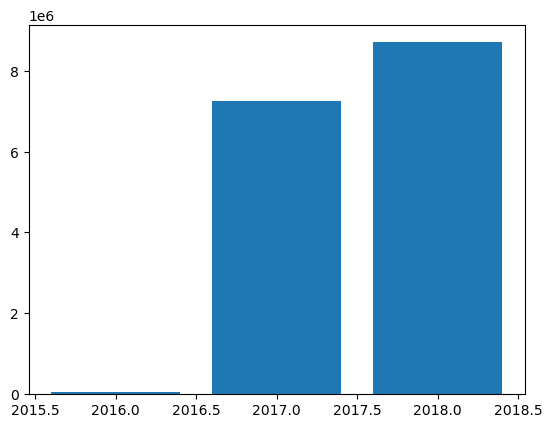

In [39]:
plt.bar(yoy_growth['Year'],yoy_growth['Sales'])

### Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [33]:
query="""
with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 1 month)
group by a.customer_id) 

select  100*(count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;
"""
cursor.execute(query)
data = cursor.fetchall()
print(data[0][0])

None


### Identify the top 3 customers who spent the most money in each year.

In [35]:
query="""
select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;
"""
cursor.execute(query)
data = cursor.fetchall()
topCust=pd.DataFrame(data,columns=['Year','Customer Id','Purchase','Rank'])
topCust

,Year,Customer Id,Purchase,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


In [36]:
sns.barplot(x = "Customer Id", y = "Purchase", data = topCust, hue = "Year")
plt.xticks(rotation = 90)
plt.show()


NameError: name 'sns' is not defined